In [1]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'large',
          'figure.figsize': (5, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize}
pylab.rcParams.update(params)

import numpy as np
import h5py

In [5]:
#tag = 'gri_cosmos'
#tag = 'gri_100k'
tag = 'gri'
#base_dir = '/archive/k/ksf293/kavli/anomaly/results'
base_dir = '/scratch/ksf293/kavli/anomaly'
results_dir = f'{base_dir}/results'
results_fn = f'{results_dir}/results_{tag}.h5'

In [6]:
res = h5py.File(results_fn)

In [7]:
res.keys()

<KeysViewHDF5 ['anomaly_scores', 'disc_scores', 'gen_scores', 'idxs', 'object_ids', 'reconstructed']>

In [8]:
gen_scores = res['gen_scores']
disc_scores = res['disc_scores']
scores = res['anomaly_scores']

Text(0, 0.5, '#')

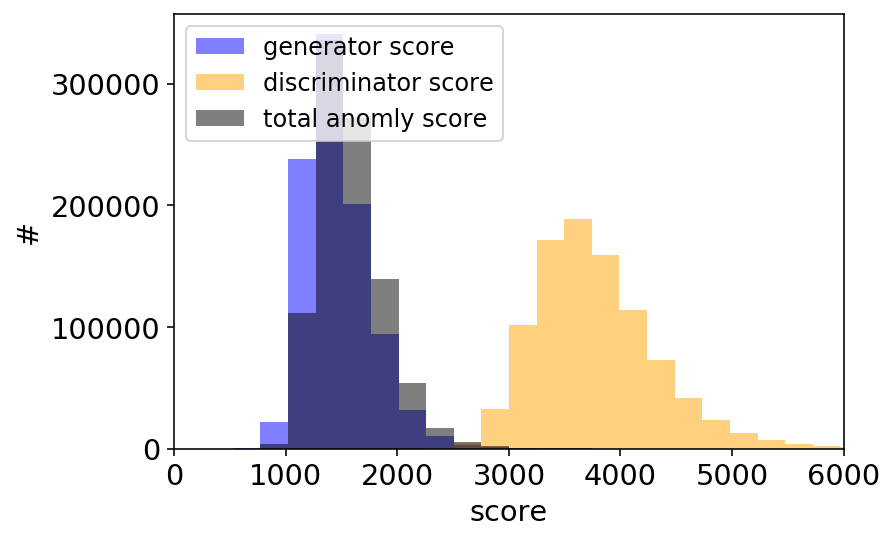

In [10]:
minmin = min(min(gen_scores), min(disc_scores))
maxmax = max(max(gen_scores), max(disc_scores))
bins = np.linspace(minmin, maxmax, 150)
b = plt.hist(gen_scores, bins=bins, alpha=0.5, color='blue', label='generator score')
b = plt.hist(disc_scores, bins=bins, alpha=0.5, color='orange', label='discriminator score')
b = plt.hist(scores, bins=bins, alpha=0.5, color='black', label='total anomly score')
plt.xlim(0, 6000)
plt.legend(loc='upper left')
plt.xlabel("score")
plt.ylabel("#")

Text(0, 0.5, 'discriminator score')

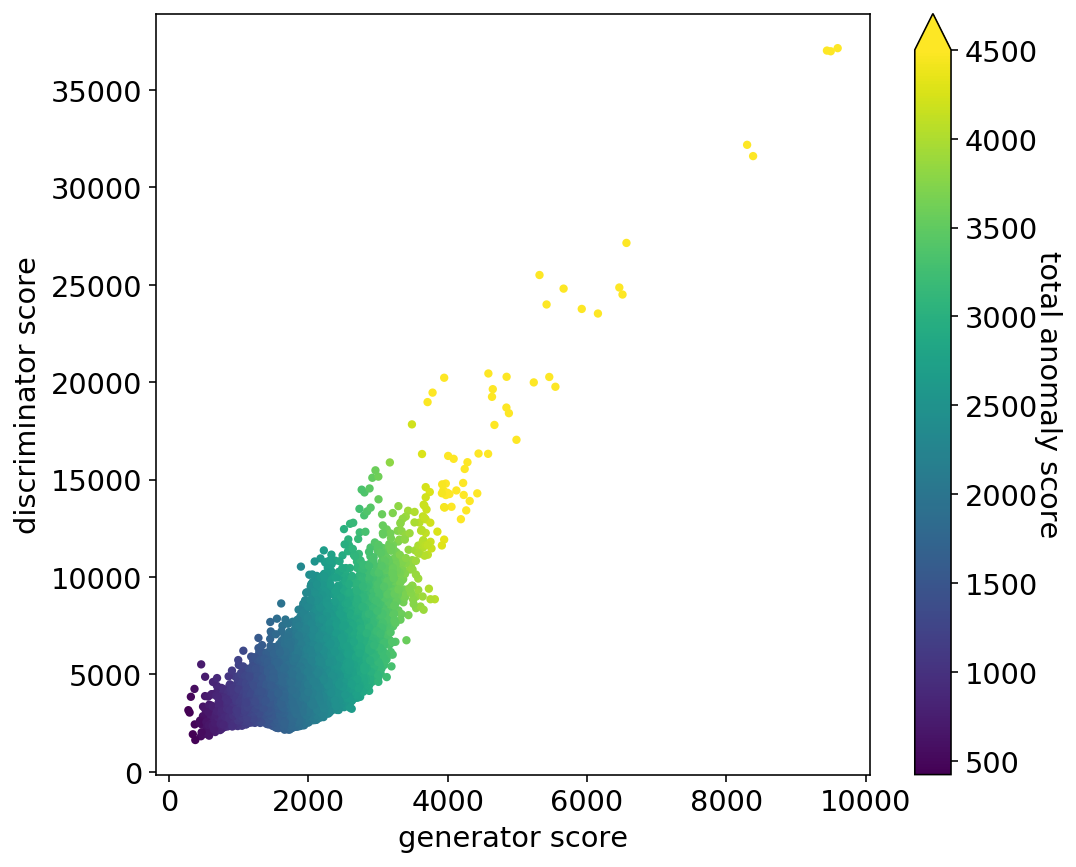

In [11]:
plt.figure(figsize=(8,7))
plt.scatter(gen_scores, disc_scores, c=scores, s=10, vmin=min(scores), vmax=4500, cmap='viridis')
cbar = plt.colorbar(extend='max')
cbar.set_label(label="total anomaly score", rotation=270, labelpad=12)
plt.xlabel("generator score")
plt.ylabel("discriminator score")

In [12]:
def norm0to1(a):
    return (a - np.min(a))/np.ptp(a)    

In [13]:
gs = norm0to1(gen_scores)
ds = norm0to1(disc_scores)

Text(0, 0.5, '#')

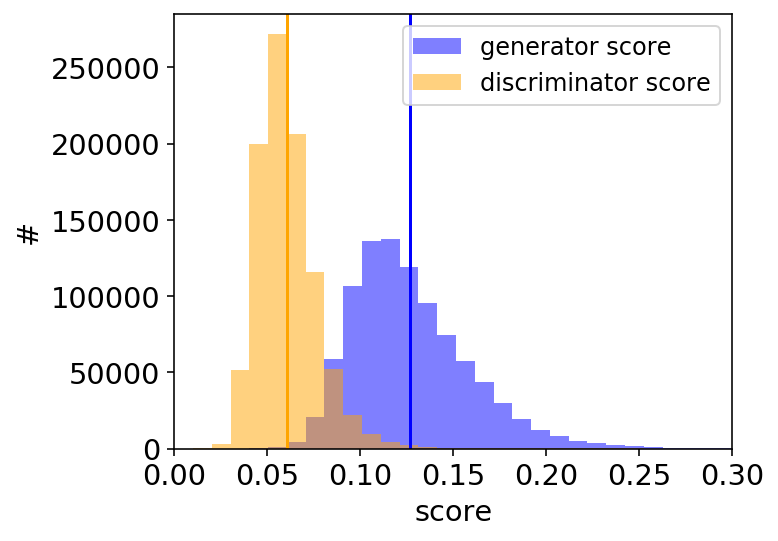

In [14]:
minmin = min(min(gs), min(ds))
maxmax = max(max(gs), max(ds))
bins = np.linspace(minmin, maxmax, 100)
plt.figure(figsize=(5,4))
b = plt.hist(gs, bins=bins, alpha=0.5, color='blue', label='generator score')
b = plt.hist(ds, bins=bins, alpha=0.5, color='orange', label='discriminator score')
gsmean = np.mean(gs)
dsmean = np.mean(ds)
plt.axvline(gsmean, color='blue')
plt.axvline(dsmean, color='orange')
plt.xlim(0, 0.3)
plt.legend()
plt.xlabel("score")
plt.ylabel("#")

The distributions are so different bc the normalization is sensitive to outliers! What's a better normalization?

In [15]:
lambda_means = dsmean/gsmean
print(lambda_means)
ascore_mean = (1-lambda_means)*gs + lambda_means*ds

0.47959286


Text(0, 0.5, '#')

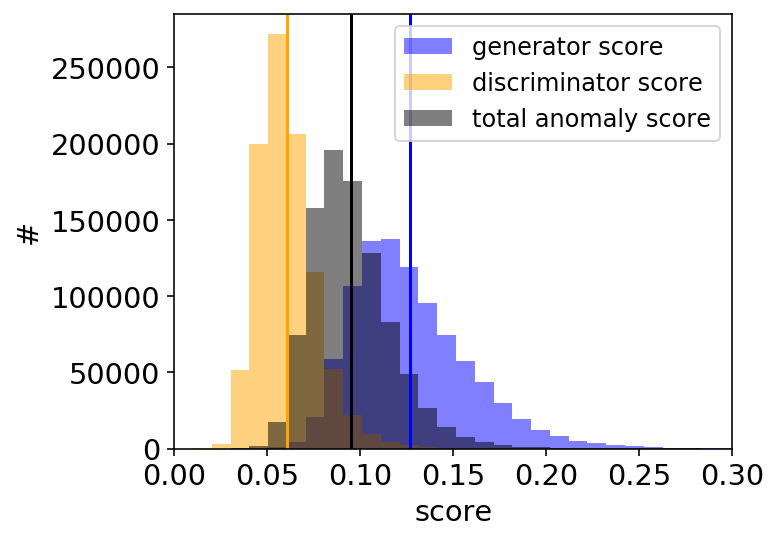

In [16]:
minmin = min(min(gs), min(ds))
maxmax = max(max(gs), max(ds))
bins = np.linspace(minmin, maxmax, 100)
plt.figure(figsize=(5,4))
b = plt.hist(gs, bins=bins, alpha=0.5, color='blue', label='generator score')
b = plt.hist(ds, bins=bins, alpha=0.5, color='orange', label='discriminator score')
plt.hist(ascore_mean, bins=bins, alpha=0.5, color='black', label='total anomaly score')
plt.axvline(np.mean(ascore_mean), color='black')
plt.axvline(gsmean, color='blue')
plt.axvline(dsmean, color='orange')
plt.xlim(0,0.3)
plt.legend()
plt.xlabel("score")
plt.ylabel("#")

Text(0, 0.5, 'discriminator score')

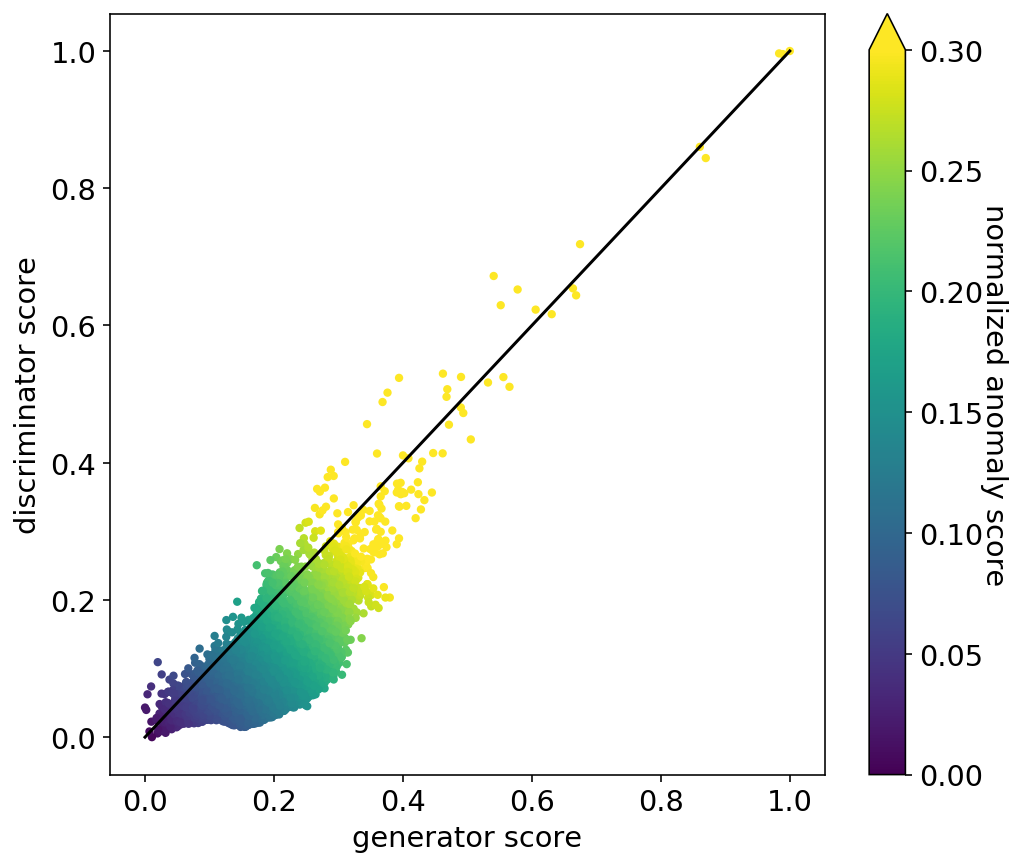

In [17]:
plt.figure(figsize=(8,7))
plt.scatter(gs, ds, c=ascore_mean, s=10, vmin=0, vmax=0.3)
cbar = plt.colorbar(extend='max')
cbar.set_label(label="normalized anomaly score", rotation=270, labelpad=12)
x = np.linspace(min(gs), max(gs), 100)
plt.plot(x, x, color='k')
plt.xlabel("generator score")
plt.ylabel("discriminator score")

Text(0, 0.5, 'normalized anomaly score')

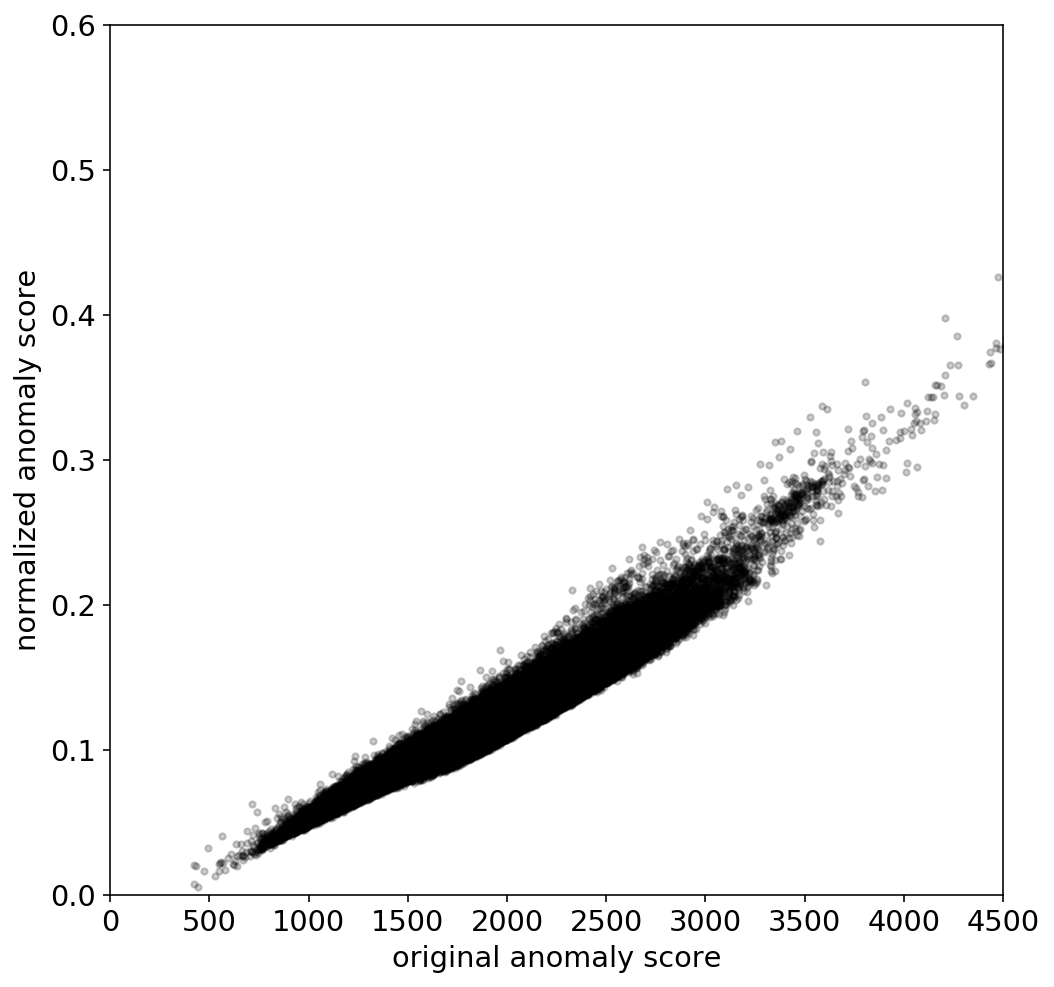

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(scores, ascore_mean, s=10, c='k', alpha=0.2)
plt.xlim(0, 4500)
plt.ylim(0, 0.6)
plt.xlabel("original anomaly score")
plt.ylabel("normalized anomaly score")

In [19]:
def norm(a, nmin, nmax):
    return (a - nmin)/(nmax-nmin)   

In [20]:
dsm = np.array(ds - np.mean(ds))
gsm = np.array(gs - np.mean(gs))
minmin = min(min(dsm),min(gsm))
dsm -= minmin
gsm -= minmin
print(min(gsm), max(gsm), np.mean(gsm), np.std(gsm))
print(min(dsm), max(dsm), np.mean(dsm), np.std(dsm))

0.0 1.0 0.12705988 0.031862617
0.06612287 1.0661229 0.12705988 0.017146247


In [21]:
lambda_tune = 0.5
asm = (1-lambda_tune)*gsm + lambda_tune*dsm

Text(0, 0.5, '#')

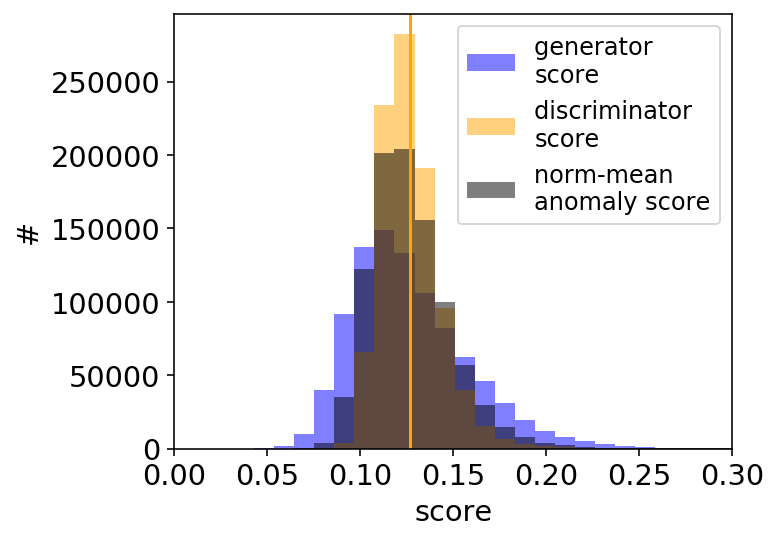

In [22]:
minmin = min(min(gsm), min(dsm))
maxmax = max(max(gsm), max(dsm))
bins = np.linspace(minmin, maxmax, 100)
plt.figure(figsize=(5,4))
b = plt.hist(gsm, bins=bins, alpha=0.5, color='blue', label='generator \nscore')
b = plt.hist(dsm, bins=bins, alpha=0.5, color='orange', label='discriminator \nscore')
b = plt.hist(asm, bins=bins, alpha=0.5, color='black', label='norm-mean \nanomaly score')
plt.axvline(np.mean(asm), color='black')
gsmean = np.mean(gsm)
dsmean = np.mean(dsm)
plt.axvline(gsmean, color='blue')
plt.axvline(dsmean, color='orange')
plt.xlim(0,0.3)
plt.legend()
plt.xlabel("score")
plt.ylabel("#")

Text(0, 0.5, 'discriminator score')

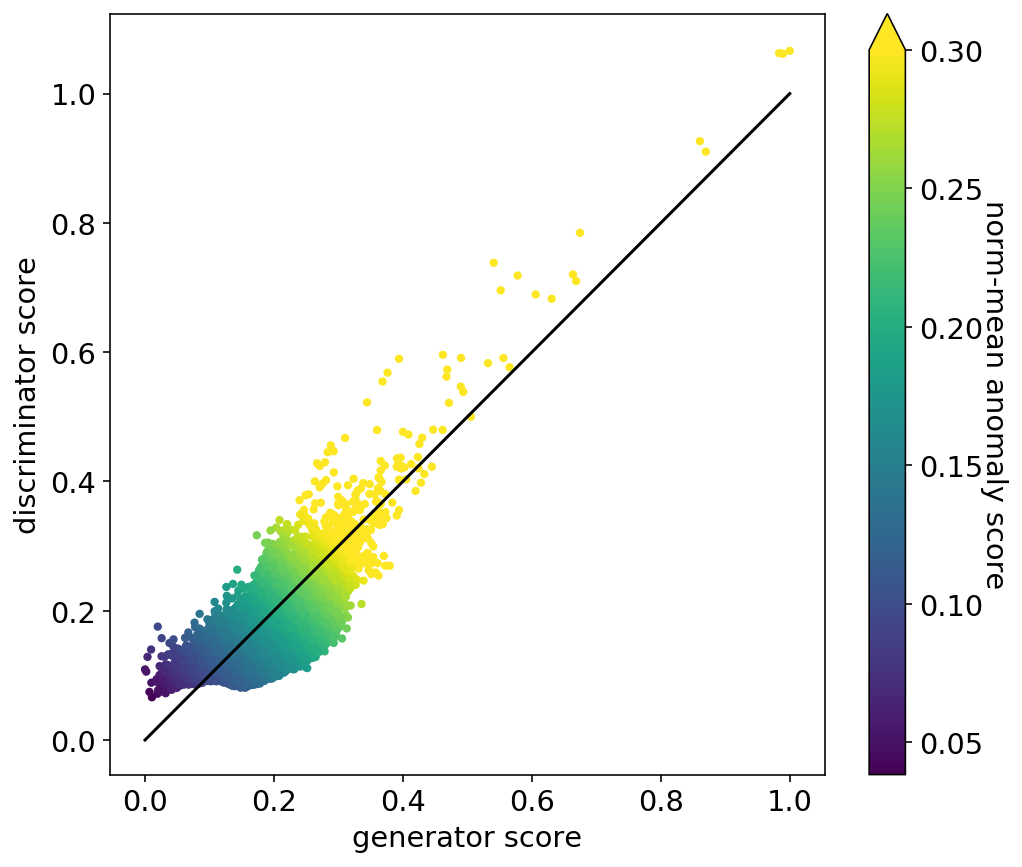

In [23]:
plt.figure(figsize=(8,7))
plt.scatter(gsm, dsm, c=asm, s=10, vmin=min(asm), vmax=0.3)
cbar = plt.colorbar(extend='max')
cbar.set_label(label="norm-mean anomaly score", rotation=270, labelpad=12)
x = np.linspace(min(gs), max(gs), 100)
plt.plot(x, x, color='k')
plt.xlabel("generator score")
plt.ylabel("discriminator score")

Text(0, 0.5, 'norm-mean anomaly score')

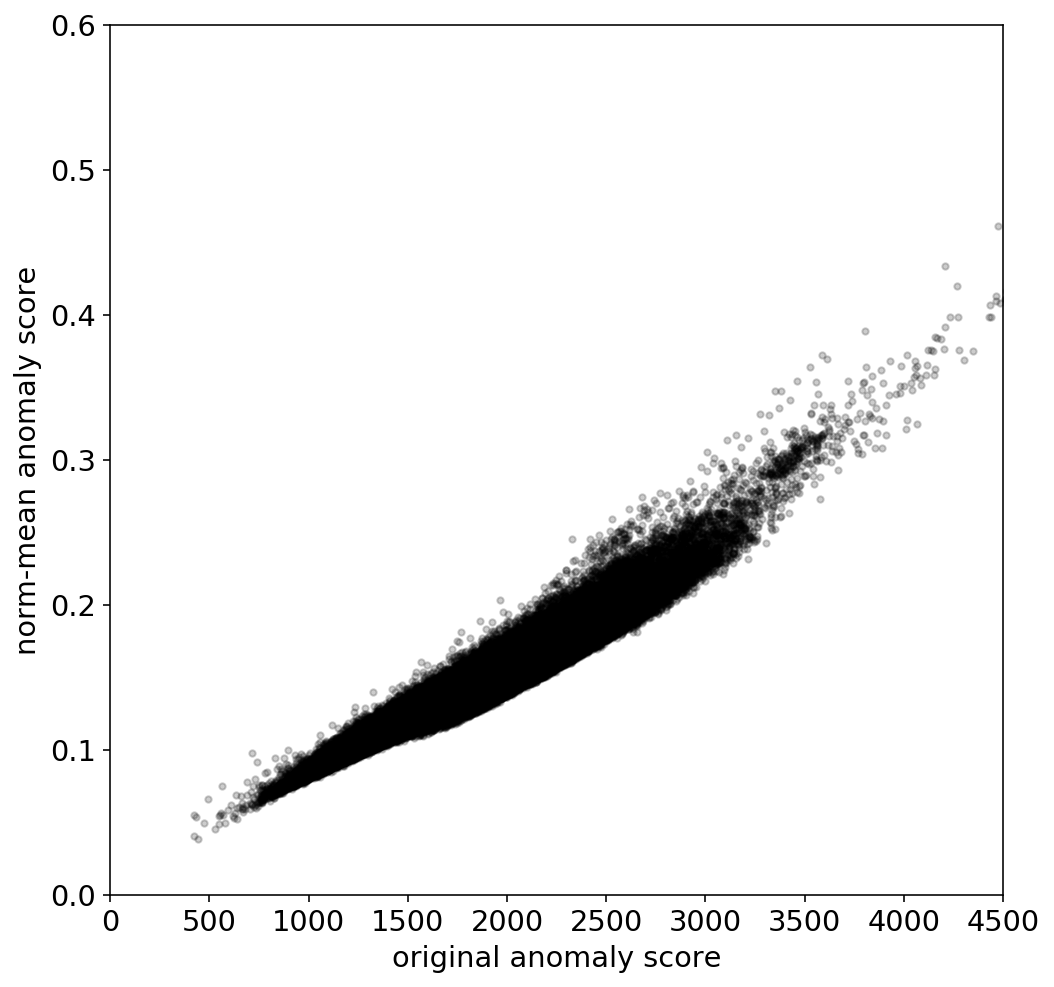

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(scores, asm, s=10, c='k', alpha=0.2)
plt.xlim(0, 4500)
plt.ylim(0, 0.6)
plt.xlabel("original anomaly score")
plt.ylabel("norm-mean anomaly score")

In [25]:
cov = np.cov(gen_scores, disc_scores)

In [26]:
cov

array([[ 88120.38484324, 108595.13890702],
       [108595.13890702, 371020.21597983]])

In [27]:
pearson = cov / (np.std(gen_scores) * np.std(disc_scores))

In [36]:
from scipy.stats import pearsonr
corr, _ = pearsonr(gen_scores, disc_scores)
print('Pearsons correlation orig:', corr)

corr, _ = pearsonr(gsm, dsm)
print('Pearsons correlation norm-mean:', corr)

Pearsons correlation orig: 0.6005835125996479
Pearsons correlation norm-mean: 0.6005835134693901


Pearsons correlation: 0.6005835125996479
